In [302]:
# coding: UTF-8
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation

nx=64+4
ny=64+4
nd=19
nloop=100+1
step=1

In [303]:
#dir53 = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-2D-1/cg1-T10-rho1-cen-128-1000st/'
dir53 = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-2D-1/cg1-T10-rho1-cen-64-1000st/'
#dir54 = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-2D-1/cg1-T20-rho1-cen-128-1000st/'
#dir55 = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-2D-1/cg1-T40-rho1-cen-128-1000st/'

#dir56 = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-2D-1/cg1-T30-rho1-cen-128-1000st/'

data = np.loadtxt(dir53+'phi2D00021.DAT', delimiter=',', unpack=True ,dtype='float')
a = np.arange(nd)
#a
print(data.shape)
rdata = np.reshape(data[a, :], (nd, ny ,nx))
rdata[0,:,:]
nmax=np.max(rdata[6,:,:])
nmin=np.min(rdata[6,:,:])


#rdata.transpose(0,2, 1)
'''
ddata = np.loadtxt(dir54+'phi2D00099.DAT', delimiter=',', unpack=True ,dtype='float') 
rddata = np.reshape(ddata[a, :], (nd, ny ,nx))
dmax=np.max(rddata[6,:,:])
dmin=np.min(rddata[6,:,:])

edata = np.loadtxt(dir55+'phi2D00099.DAT', delimiter=',', unpack=True ,dtype='float') 
redata = np.reshape(edata[a, :], (nd, ny ,nx))
emax=np.max(redata[6,:,:])
emin=np.min(redata[6,:,:])
'''

#fdata = np.loadtxt(dir56+'phi2D00099.DAT', delimiter=',', unpack=True ,dtype='float') 
#rfdata = np.reshape(fdata[a, :], (nd, ny ,nx))
#fmax=np.max(rfdata[6,:,:])
#fmin=np.min(rfdata[6,:,:])

#err=rdata[6,:,:]-rdata[12,:,:]
#err=(rdata[6,:,:]-rddata[6,:,:])#/(nmax-nmin)
#rms = np.sqrt(np.mean(err*err))

#drr=(rdata[6,:,:]-redata[6,:,:])#/(nmax-nmin)
#dms = np.sqrt(np.mean(drr*drr))

#frr=(rdata[6,:,:]-rfdata[6,:,:])#/(nmax-nmin)
#fms = np.sqrt(np.mean(frr*frr))

#rms,dms,fms,nmin,nmax

(19, 4624)


"\nddata = np.loadtxt(dir54+'phi2D00099.DAT', delimiter=',', unpack=True ,dtype='float') \nrddata = np.reshape(ddata[a, :], (nd, ny ,nx))\ndmax=np.max(rddata[6,:,:])\ndmin=np.min(rddata[6,:,:])\n\nedata = np.loadtxt(dir55+'phi2D00099.DAT', delimiter=',', unpack=True ,dtype='float') \nredata = np.reshape(edata[a, :], (nd, ny ,nx))\nemax=np.max(redata[6,:,:])\nemin=np.min(redata[6,:,:])\n"

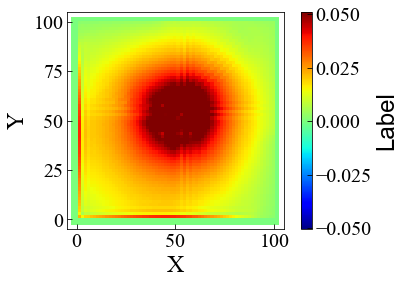

In [304]:
plt.pcolormesh(rdata[0,:,:], rdata[1,:,:], rdata[7,:,:]-rdata[12,:,:], cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。
#plt.pcolormesh(rddata[0,:,:], rddata[1,:,:], rddata[6,:,:], cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。
#plt.pcolormesh(redata[0,:,:], redata[1,:,:], redata[6,:,:], cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。
#plt.pcolor(X, Y, Z, cmap='hsv') # 等高線図の生成。cmapで色付けの規則を指定する。

plt.clim(-0.0505, 0.0510)
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 "vertical"
pp.set_label("Label", fontname="Arial", fontsize=24) #カラーバーのラベル

plt.xlim([-5.0, 105.0]) # x方向の描画範囲を指定
plt.ylim([-5.0, 105.0]) # y方向の描画範囲を指定
plt.xlabel('X', fontsize=24)
plt.ylabel('Y', fontsize=24)
#fig = plt.figure(figsize=(5, 5))
#ax.set_aspect('equal', adjustable='box')
#quadmesh.set_clim(vmin=0, vmax=15)
#plt.axes().set_aspect('equal', 'datalim')
plt.gca().set_aspect('equal')


plt.show()

In [305]:
a = np.arange(nd)
dmy = [0]*nx*ny
dmy = np.reshape(dmy, (ny ,nx))

for i in range(nloop):
    data = np.loadtxt(dir53+'phi2D'+"%05.f"%(i)+'.dat', delimiter=',', unpack=True ,dtype='float') 
    rdata = np.reshape(data[a, :], (nd, ny ,nx))
    
    #ddata = np.loadtxt(dir54+'phi2D'+"%05.f"%(i)+'.dat', delimiter=',', unpack=True ,dtype='float') 
    #rddata = np.reshape(ddata[a, :], (nd, ny ,nx))
    
    fig = plt.figure()
    fig.subplots_adjust(bottom=0.2)
    #fig.subplots_adjust(left=0.1)
    #fig.subplots_adjust(right=0)
    #plt.pcolormesh(rdata[0,:,:], rdata[1,:,:], rdata[6,:,:], cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。 hsv
    #plt.pcolormesh(rdata[0,:,:], rdata[1,:,:], rdata[6,:,:]-rddata[6,:,:], cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。 hsv
    #plt.pcolormesh(rdata[0,:,:], rdata[1,:,:], rdata[6,:,:]-dmy, cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。 hsv
    plt.pcolormesh(rdata[0,:,:], rdata[1,:,:], rdata[6,:,:]-rdata[12,:,:], cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。 hsv
    dmy=rdata[6,:,:]
    #plt.pcolor(X, Y, Z, cmap='hsv') # 等高線図の生成。cmapで色付けの規則を指定する。
    
    plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
    plt.rcParams["mathtext.fontset"] = "cm"
    plt.rcParams['mathtext.default'] = 'it'
    plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
    #plt.rcParams["xtick.minor.visible"] = True          #x軸補助目盛りの追加
    #plt.rcParams["ytick.minor.visible"] = True          #y軸補助目盛りの追加
    #plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
    #plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
    #plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
    #plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
    plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
    plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
    #plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
    #plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
    plt.rcParams["font.size"] = 20                       #フォントの大きさ
    #plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ
    plt.xlim([-5.0, 105.0]) # x方向の描画範囲を指定
    plt.ylim([-5.0, 105.0]) # y方向の描画範囲を指定
    plt.rcParams["legend.markerscale"] = 2
    plt.rcParams["legend.fancybox"] = False
    plt.rcParams["legend.framealpha"] = 1
    plt.rcParams["legend.edgecolor"] = 'black'
    
    #plt.clim(-0.1, 0.1)
    plt.clim(-0.005, 0.05)
    pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
    pp.set_label("Phi", fontsize=24) #カラーバーのラベル

    plt.xlabel('X', fontsize=20)
    plt.ylabel('Y', fontsize=20)
    #fig = plt.figure(figsize=(5, 5))
    #ax.set_aspect('equal', adjustable='box')
    #plt.axes().set_aspect('equal', 'datalim')
    plt.gca().set_aspect('equal')

    #plt.show()
    #pp = PdfPages(dir53+'phi2D'+"%05.f"%(i)+'.pdf')
    # 画像をPDFとして保存する
    #pp.savefig(fig)
    #fig.savefig(dir53+'sa/phi-equi'+"%05.f"%(i)+'.png')
    fig.savefig(dir53+'phi-equi'+"%05.f"%(i)+'.png')
    #pp.close()
    plt.close()

0.03472504833789447


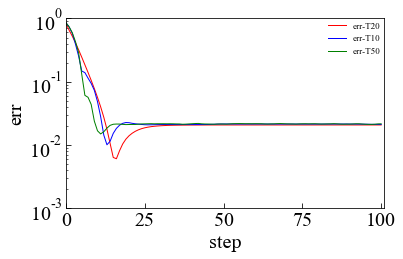

In [306]:
rms = [0] * nloop
drms = [0] * nloop
erms = [0] * nloop
b = np.arange(nloop)
b=b*step

dir55 = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-2D-1/cg1-T10-rho1-cen-32-1000st/'
dir56 = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-2D-1/cg1-T50-rho1-cen-64-1000st/'

for i in range(nloop):
    data = np.loadtxt(dir53+'phi2D'+"%05.f"%(i)+'.dat', delimiter=',', unpack=True ,dtype='float') 
    rdata = np.reshape(data[a, :], (nd, ny ,nx))
    
    #data = np.loadtxt(dir54+'phi2D'+"%05.f"%(i)+'.dat', delimiter=',', unpack=True ,dtype='float') 
    #rdata = np.reshape(data[a, :], (nd, ny ,nx))
    
    #ddata = np.loadtxt(dir55+'phi2D'+"%05.f"%(i)+'.dat', delimiter=',', unpack=True ,dtype='float') 
    #rddata = np.reshape(ddata[a, :], (nd, ny ,nx))
    
    edata = np.loadtxt(dir56+'phi2D'+"%05.f"%(i)+'.dat', delimiter=',', unpack=True ,dtype='float') 
    redata = np.reshape(edata[a, :], (nd, ny ,nx))
    
    err=rdata[7,:,:]-rdata[12,:,:]
    #derr=rddata[8,:,:]-rddata[12,:,:]
    #derr=rdata[8,:,:]-rdata[12,:,:]
    derr=redata[7,:,:]-redata[12,:,:]
    eerr=redata[9,:,:]-redata[12,:,:]
    #err[nx-2,:]=0.0
    #err[:,ny-2]=0.0
    rms[i] = np.sqrt(np.mean(err*err)/3)
    drms[i] = np.sqrt(np.mean(derr*derr)/3)
    erms[i] = np.sqrt(np.mean(eerr*eerr)/3)


errtest=rdata[7,nx-2,ny-2]-rdata[12,nx-3,ny-3]
print(errtest)

fig = plt.figure()
#fig.subplots_adjust(bottom=0.21)
#fig.subplots_adjust(left=0.1)
#fig.subplots_adjust(right=0)
ax = fig.add_subplot(111)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
plt.xlim([0.0, nloop*step]) # x方向の描画範囲を指定
plt.ylim([0.001, 1.0]) # y方向の描画範囲を指定
plt.rcParams["legend.markerscale"] = 2
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'


plt.yscale('log')
plt.plot(b,rms, color='red' , linestyle = "solid", markersize=2.5, linewidth = 1,label="err-T20")
plt.plot(b,drms, color='blue' , linestyle = "solid", markersize=2.5, linewidth = 1,label="err-T10")
plt.plot(b,erms, color='green' , linestyle = "solid", markersize=2.5, linewidth = 1,label="err-T50")

ax.set_xlabel('step')
ax.set_ylabel('err')

plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=9,frameon=False)

fig.tight_layout()
#グラフ表示
plt.show()
#plt.figure(figsize=(5, 6))

# 保存するPDFファイル名
pp = PdfPages(dir53+'test1.pdf')
pp = PdfPages('/Users/maeda/Desktop/test1.pdf')
# 画像をPDFとして保存する
pp.savefig(fig)
# PDFの保存終了
pp.close()
#plt.savefig("R-Vesc.png")